In [1]:
import gymnasium as gym

from stable_baselines3 import SAC, DDPG, PPO


from environment import *
from env_wrappers import *
from matplotlib import pyplot as plt
from general_utils import *
from delay_model import *
from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise
import torch
from wc_sac import *
from stable_baselines3.common.logger import Logger, configure
import datetime
import copy
from test_utils import *
from train_utils import *
from orchestrator import *
from safe_sac import SafeSAC

%load_ext autoreload
%autoreload 2

plt.rcParams['font.family'] = 'serif'

In [8]:
lin_model, lincore_env = train_default_sac(
    env_type='linear',
    agent_type='sac',
    desired_state=0.8, 
    n_episodes=100,
    save = False
)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to logs/train/LinearVelocity/0519/Desired0.8/sac
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 120      |
|    ep_rew_mean     | -48.7    |
| time/              |          |
|    episodes        | 4        |
|    fps             | 36       |
|    time_elapsed    | 13       |
|    total_timesteps | 480      |
| train/             |          |
|    actor_loss      | -0.114   |
|    critic_loss     | 0.00529  |
|    ent_coef        | 0.5      |
|    learning_rate   | 0.0003   |
|    n_updates       | 379      |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 120      |
|    ep_rew_mean     | -73      |
| time/              |          |
|    episodes        | 8        |
|    fps             | 33       |
|    time_elapsed    | 28       |
|    total_timesteps | 960      |

In [76]:
lincore_env.desired_state = np.array([0.0])
lincore_env.start_state = np.array([2.0])
states, actions, rewards, avg_rewards, executed_actions = test_agent(lin_model, RescaleAction(lincore_env),deterministic=True)
states = - (np.array(states) - lincore_env.desired_state)

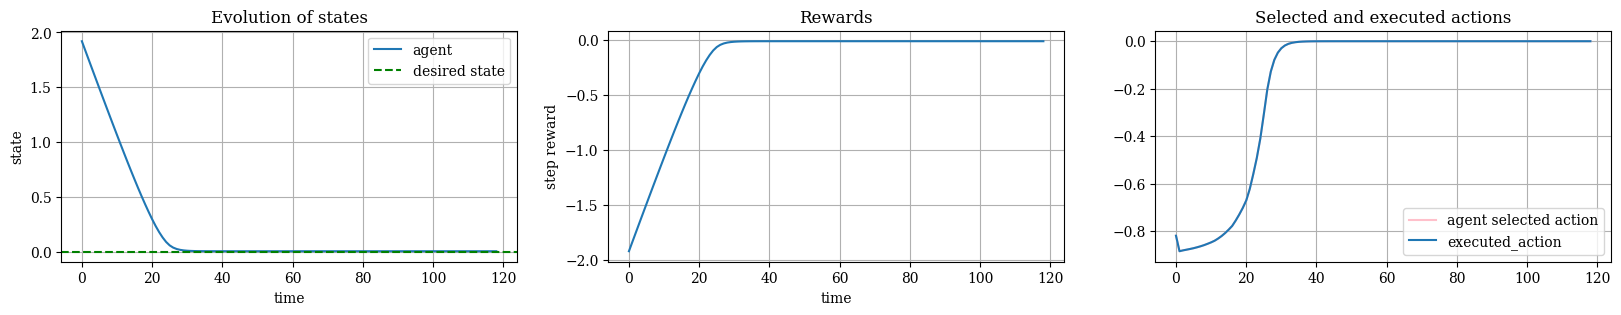

In [77]:
plot_test(lincore_env, states, rewards, actions, executed_actions)